In [6]:
# Import NumPy for numerical operations
import numpy as np

# Import PyTorch for building and training neural networks
import torch
import torch.nn as nn
import torch.optim as optim

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import libraries for random operations and data serialization
import random
import pickle

# Import a utility module for additional plotting functions
import utils_plots

# Import the time module to time our training process
import time

# Ignore Warning Messages
import warnings
warnings.filterwarnings("ignore")


from ricker import ricker
from gll import gll
from lagrange1st import lagrange1st 

In [27]:
# Initialization of setup
# ---------------------------------------------------------------
nt    = 10_000       # number of time steps
xmax  = 1000.        # Length of domain [m]
vs    = 2500.         # S velocity [m/s]
rho   = 2200          # Density [kg/m^3]
mu    = rho * vs**2   # Shear modulus mu
N     = 5           # Order of Lagrange polynomials
ne    = 125           # Number of elements
Tdom  = 0.2            # Dominant period of Ricker source wavelet
iplot = 5            # Plotting each iplot snapshot

# variables for elemental matrices
Me = np.zeros(N+1, dtype =  float)
Ke = np.zeros((N+1, N+1), dtype =  float)
# ----------------------------------------------------------------

# Initialization of GLL points integration weights
[xi, w] = gll(N)    # xi, N+1 coordinates [-1 1] of GLL points
                    # w Integration weights at GLL locations
# Space domain
le = xmax/ne        # Length of elements
# Vector with GLL points  
k = 0

# Initialization of physical coordinates xg in the entire space (commment added May 15, 2020)
xg = np.zeros((N*ne)+1) 
xg[k] = 0
for i in range(1,ne+1):
    for j in range(0,N):
        k = k+1
        xg[k] = (i-1)*le + .5*(xi[j+1]+1)*le

# ---------------------------------------------------------------
dxmin = min(np.diff(xg))  
eps = 0.2           # Courant value
dt = eps*dxmin/vs   # Global time step
# initialize source time function and force vector f
src  = ricker(dt,Tdom)
dt

7.518229634257068e-05

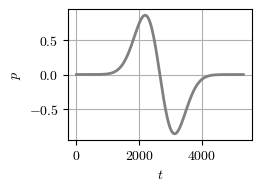

In [28]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(2.5, 1.8))

# Plot the function
ax.plot(src, color='gray', linewidth=2)

# Set the labels for the x and y axes
ax.set_xlabel('$t$')
ax.set_ylabel('$p$')

# Display the grid
ax.grid(True)

# Set the title for the plot
#ax.set_title(r'$y=\sin(x)$')

# Save the plot as a PDF file in the 'imgs' directory
#fig.savefig('imgs/1_sine_function.png', format='png')

# Display the plot
plt.show()

In [ ]:
# SE Solution, Time extrapolation
# ---------------------------------------------------------------
#factor = 10e+8
# initialize source time function and force vector f
#src  = factor*ricker(dt,Tdom)
t = np.linspace(0 * dt, nt * dt, nt)
f0 = 25. # dominant frequency of the source (Hz)
t0 = 0.7 / f0 # source time shift
a = np.pi*np.pi*f0*f0
#src = factor * np.exp(-a*(t-t0)**2) / (2 * a)
# src = - factor * (t-t0)*np.exp(-a*(t-t0)**2)
#src = - factor * (1 - 2*a*(t-t0)**2)*np.exp(-a*(t-t0)**2)
# Source time function (Gaussian)
# -------------------------------
# Source time function parameters
# f0   = 25. # dominant frequency of the source (Hz)
# t0   = 0.5 / f0 # source time shift
# factor = 10e+8 
# src  = np.zeros(nt + 1)
# time = np.linspace(0 * dt, nt * dt, nt)
# # 1st derivative of a Gaussian
src  = -8. * (t - t0) * f0 * (np.exp(-1.0 * (4*f0) ** 2 * (t - t0) ** 2))

In [56]:
# Open the file containing the data
with open('4_se_data.pkl', 'rb') as f:
    # Load the data from the file
    # t_grid, x_grid, and u_grid are expected to be in the file
    t_grid, x_grid, u_grid = pickle.load(f)


x_grid = np.array(x_grid)  # Grid of x values
t_grid = np.array(t_grid)  # Grid of t (time) values
u_grid = np.array(u_grid)  # Grid of u (wave amplitude) values

f0 = 25. # dominant frequency of the source (Hz)
t0 = 0.7 / f0 # source time shift

# Define the source function
def src(t):
    return -8. * (t - t0) * f0 * (np.exp(-1.0 * (4*f0) ** 2 * (t - t0) ** 2))

# Create a grid for the source amplitude
source_grid = np.zeros((len(t_grid[:,0]),len(x_grid[1])))

# Set the source amplitude at x=max(x_grid)/2 for all t
source_grid[:,int(len(x_grid[1])/2) ] = src(t_grid[:,1])

np.shape(source_grid)

(2500, 626)

In [50]:
len(x_grid[1])

626

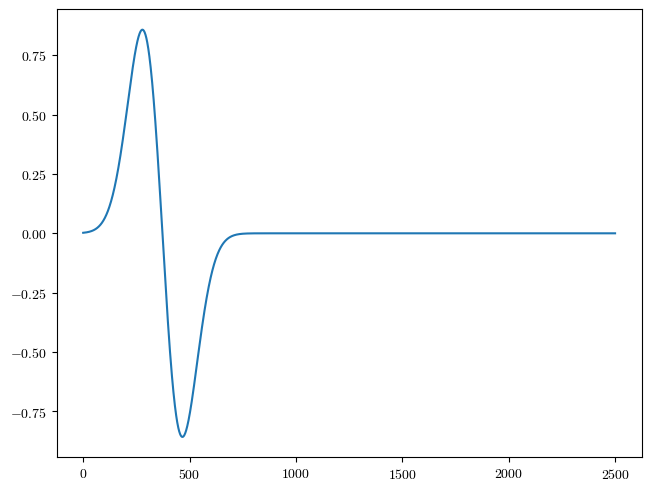

In [35]:
plt.plot(src(t_grid[:,1]))

In [47]:
np.shape(x_grid)

(2500, 626)

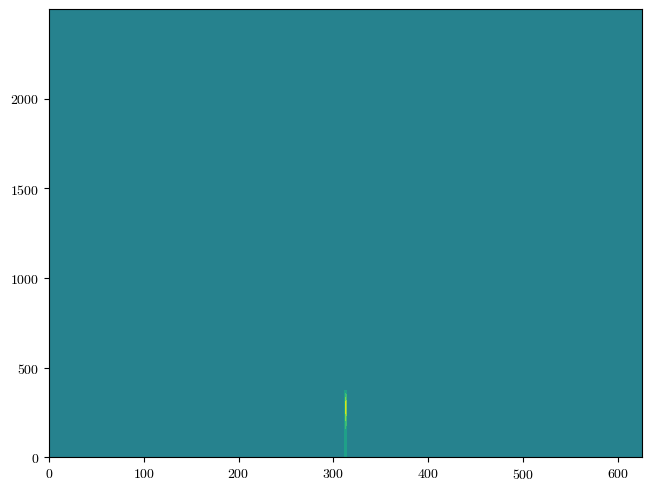

In [55]:
plt.contourf(u_source_grid)